# Step 1

**Load libraries**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import pandas
from pathlib import Path
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Step 2

**Read in data**

In [2]:
# import kc_house_data_train.csv, drop 'Unnamed' column
df_train = pd.read_csv('csv/kc_house_data_train.csv', index_col = 'id').drop(columns='Unnamed: 0')
pd.set_option("display.max_columns", None)
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
df_train.shape

(17290, 20)

In [4]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [5]:
df_train.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
df_train.nunique(axis=0)

date              371
price            3534
bedrooms           13
bathrooms          30
sqft_living       947
sqft_lot         8428
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        867
sqft_basement     290
yr_built          116
yr_renovated       69
zipcode            70
lat              4837
long              733
sqft_living15     714
sqft_lot15       7582
dtype: int64

# Step 3


**EDA**

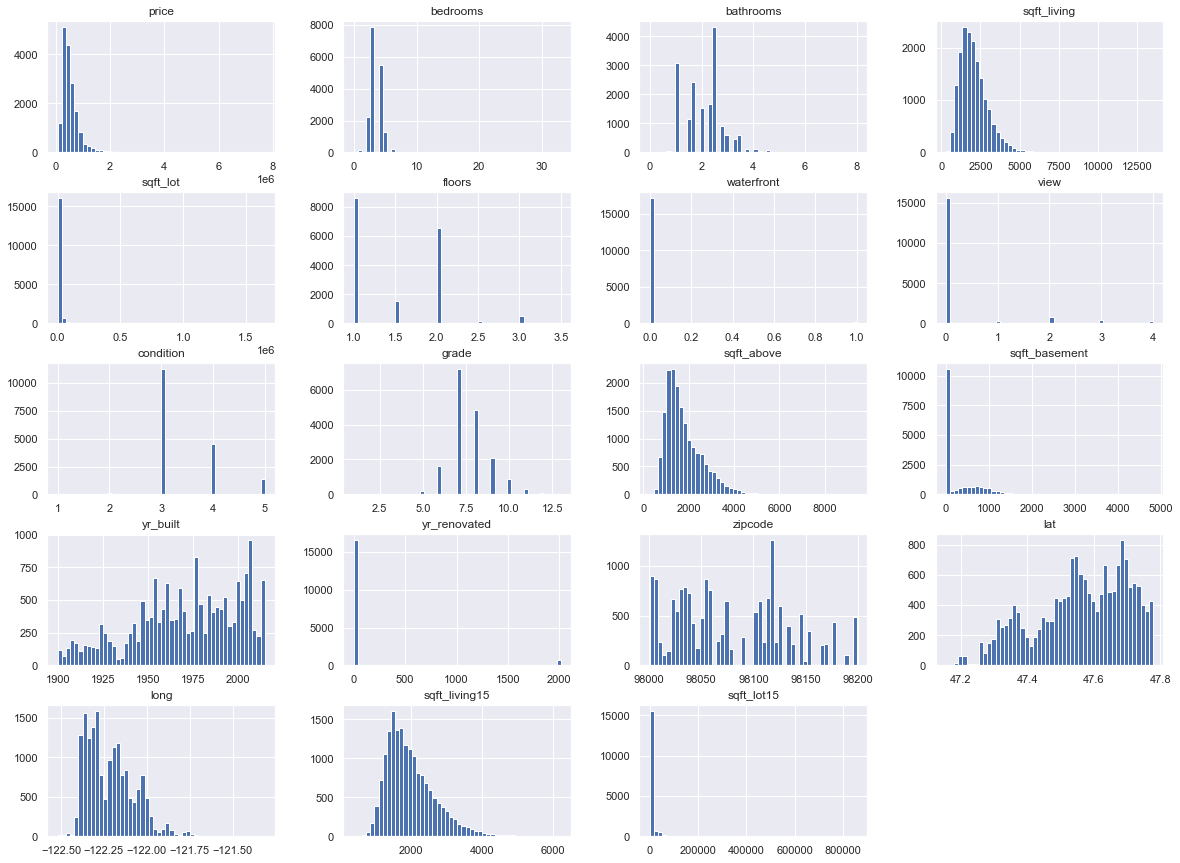

In [7]:
# distribution of values for all variables
sns.set_theme(style="darkgrid")
df_train.hist(bins=50, figsize=(20,15))
plt.show()

### Observations

bedrooms: the min is 0. All houses generally should have bedrooms. This could be a case of missing values.

bedrooms: the max is 33. The square footage of this house will have to be looked at to affirm this makes sense. This could also be a case of mistype.

bathrooms: the min is 0. All houses have at least 1 bathroom. This could be a case of missing value or non traditional properties, like barns.

floors: The number of floors seems to be a float with .5. In real-estate definition a 1.5 storey house means that the house has a floor that only spans half the size of the main floor. The data is valid here.

waterfront: the max is 1. The value is 0 at 25%, 50% and 75%. This makes sense since this variable is a dummy. Houses that have a waterfront view have a value of 1 and for no waterfront view the value is 0.

view: the max is 4 but the value is 0 at 25%, 50% and 75%. This tells me that some houses seem to have a view rating of even 0.
sqft_basement: the values at the 25th and 50th percentile is 0. This could mean that only some houses have basements and others don't.

yr_renovated: The value is 0 at 25%, 50% and 75%. This could mean that some house were never renovated once built.

In [8]:
# Price histogram
sns.set_theme(style="darkgrid")
df_train['price'].hist(bins=50, figsize=(11.7,8.27))
plt.show()

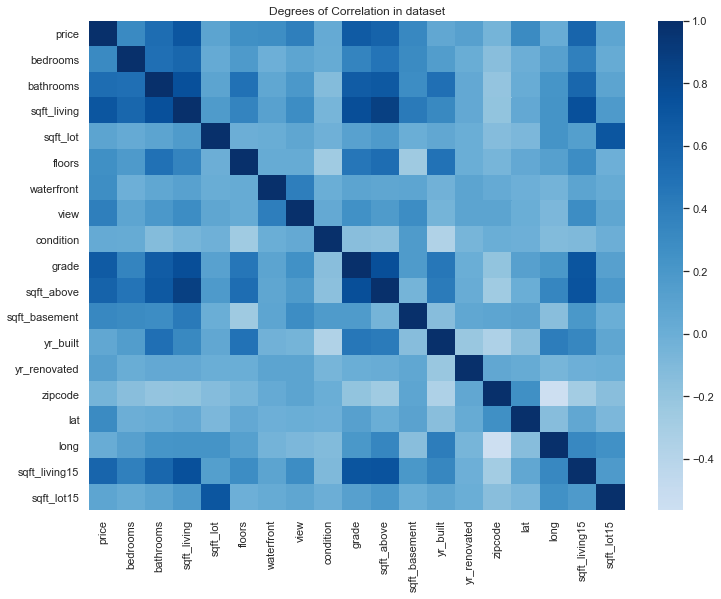

In [9]:
corr = df_train.corr()

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, \
            annot=False, cmap='Blues', center= 0)
plt.title('Degrees of Correlation in dataset');

In [10]:
df_train.corr()['price'].abs().sort_values()

long             0.019327
condition        0.036099
zipcode          0.048958
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

In [139]:
#Heat map containing absolute values
corr = df_train.corr().abs()

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, \
            annot=False, cmap='Blues', center= 0)
plt.title('Degrees of Correlation in dataset');

## Date

In [12]:
# Removing the time variable from date
df_train['date'] = df_train['date'].map(lambda x: x[:8])

# Altering the cleaned date into datetime type
df_train['date'] = pd.to_datetime(df_train['date'])


## Year renovated

In [13]:
#Change values of years renovated
df_train['yr_renovated'] = np.where(df_train['yr_renovated'] == 0, df_train['yr_built'], df_train['yr_renovated'])

In [14]:
#df_train['second_sale'] = [1 if x == True else 0 for x in df_train.duplicated(subset='id', keep='last')]

# Bedrooms

In [16]:
# fix the value for the house with 33 bedrooms
df_train['bedrooms'] = np.where((df_train['bedrooms'] == 33), 3, df_train['bedrooms'])

In [17]:
# change 0 values to 1
df_train['bedrooms'] = np.where((df_train['bedrooms'] == 0), 1, df_train['bedrooms'])

In [18]:
df_train.corr()['price']['bedrooms']

0.3143069850103595

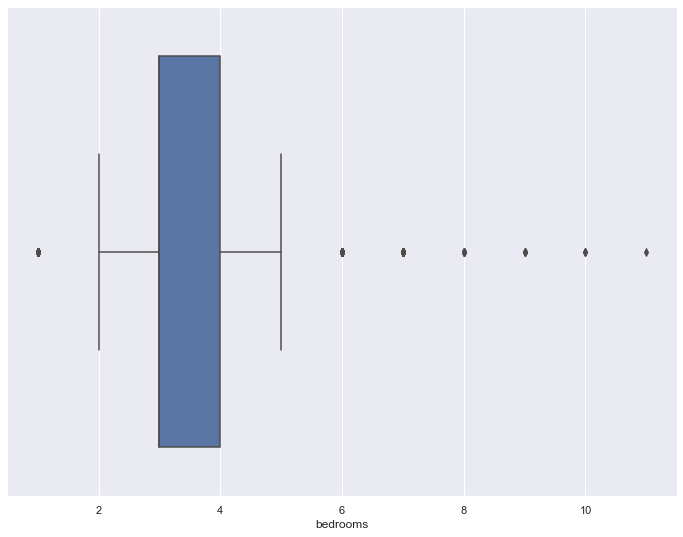

In [19]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_train["bedrooms"])
sns.set(rc={'figure.figsize':(11.7,8.27)})

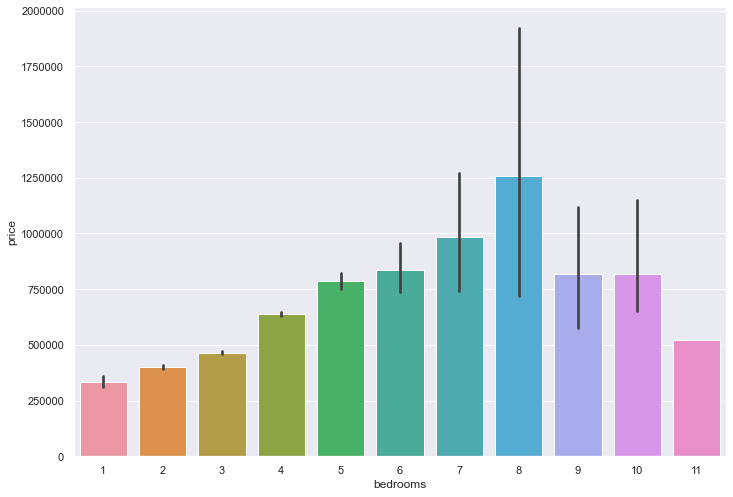

In [20]:
sns.set_style('darkgrid')
x = df_train['bedrooms']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()


Text(0.5, 1.0, 'Number of bedrooms in homes sold')

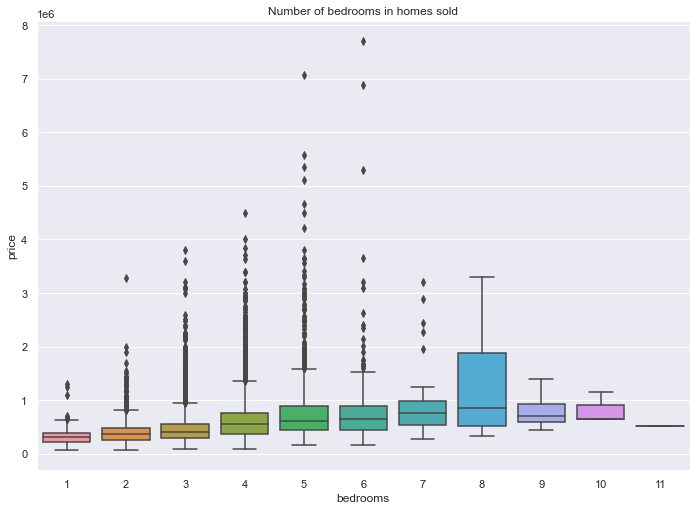

In [21]:
# maybe drop >10 bedrooms
sns.set(style="darkgrid")
sns.boxplot(x=df_train["bedrooms"],y=df_train["price"])
plt.title("Number of bedrooms in homes sold")

In [22]:
# H0: number of bedrooms does not affect house price
# Ha: number of bedrooms affects house price
# Anova (f test)

import scipy.stats as st

st.f_oneway(df_train['bedrooms'],df_train['price'])
#pvalue is less than .05 therefore we reject the null hypothesis

F_onewayResult(statistic=36274.85690345351, pvalue=0.0)

In [23]:
#run linear regression model. low R-squared score
ols(formula='price~bedrooms', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1895.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:23:44   Log-Likelihood:            -2.4547e+05
No. Observations:               17290   AIC:                         4.909e+05
Df Residuals:                   17288   BIC:                         4.910e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.059e+05   1.03e+04     10.235      0.000    8.56e+04    1.26e+05
bedrooms     1.29e+05   2962.825     43.532      0.000    1.23e+05    1.35e+05
==============================================================================
Omnibus:                    15893.999   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1153527.746
Skew:                           4.205   Prob(JB):                         0.00
Kurtosis:                      42.121   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Run linear regression model on dummied bedrooms. R-squared is higher but still low overall.
ols(formula='price~C(bedrooms)', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     204.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:23:44   Log-Likelihood:            -2.4540e+05
No. Observations:               17290   AIC:                         4.908e+05
Df Residuals:                   17279   BIC:                         4.909e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.339e+05   2.69e+04     12.401      0.000    2.81e+05    3.87e+05
C(bedrooms)[T.2]   6.678e+04    2.8e+04      2.389      0.017     1.2e+04    1.22e+05
C(bedrooms)[T.3]   1.316e+05   2.72e+04      4.836      0.000    7.83e+04    1.85e+05
C(bedrooms)[T.4]   3.039e+05   2.73e+04     11.113      0.000     2.5e+05    3.57e+05
C(bedrooms)[T.5]   4.509e+05   2.87e+04     15.724      0.000    3.95e+05    5.07e+05
C(bedrooms)[T.6]   5.038e+05   3.56e+04     14.142      0.000    4.34e+05    5.74e+05
C(bedrooms)[T.7]   6.523e+05   6.99e+04      9.336      0.000    5.15e+05    7.89e+05
C(bedrooms)[T.8]   9.217e+05   1.15e+05      8.024      0.000    6.97e+05    1.15e+06
C(bedrooms)[T.9]   4.829e+05    1.6e+05      3.015      0.003    1.69e+05    7.97e+05
C(bedrooms)[T.10]  4.855e+05   2.06e+05      2.361      0.018    8.24e+04    8.89e+05
C(bedrooms)[T.11]  1.861e+05   3.54e+05      0.526      0.599   -5.08e+05     8.8e+05
==============================================================================
Omnibus:                    15917.322   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178654.564
Skew:                           4.208   Prob(JB):                         0.00
Kurtosis:                      42.563   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# create dummy columns for bedrooms
dummy_zip = pd.get_dummies(df_train.bedrooms)
df_train = pd.concat([df_train,dummy_zip], axis='columns')

In [26]:
df_train = df_train.rename(columns={1: '1_bedroom', 2: '2_bedrooms', 3: '3_bedrooms', 4: '4_bedrooms', 5: '5_bedrooms',
                                    6: '6_bedrooms', 7: '7_bedrooms', 8: '8_bedrooms', 9: '9_bedrooms', 10: '10_bedrooms',
                                   11: '11_bedrooms'})

In [28]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0


# Bathrooms

In [33]:
df_train.corr()['price']['bathrooms']

0.5243346054984211

In [34]:
# change 0 values to 1
df_train['bathrooms'] = np.where((df_train['bathrooms'] == 0), 1, df_train['bathrooms'])

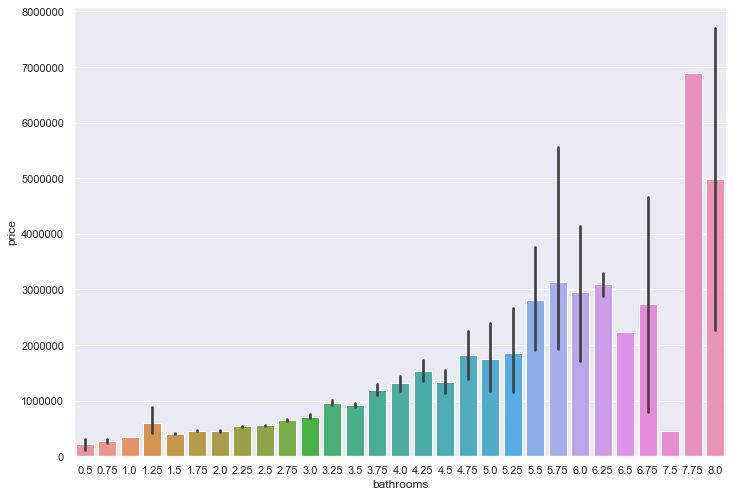

In [35]:
sns.set_style('darkgrid')
x = df_train['bathrooms']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

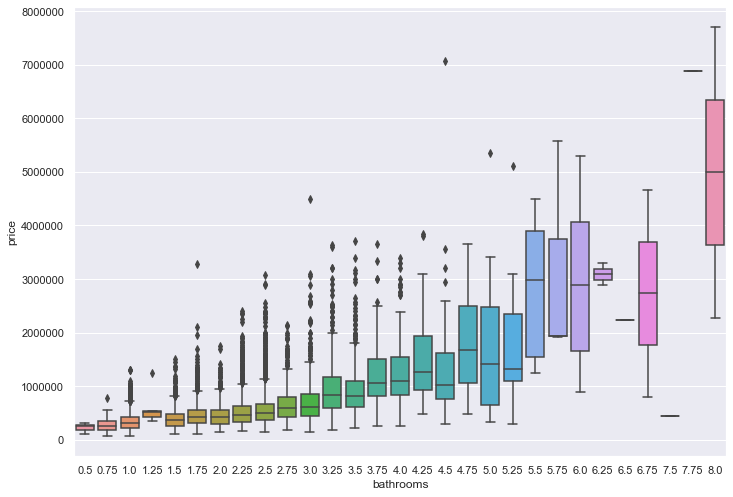

In [36]:
sns.set_style('darkgrid')
x = df_train['bathrooms']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.boxplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

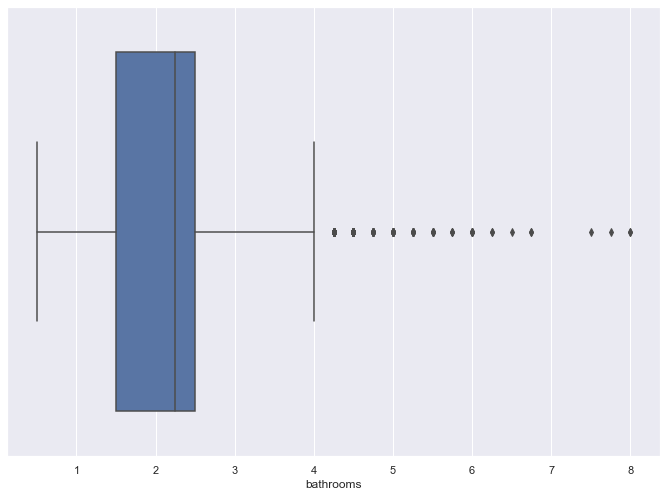

In [37]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_train["bathrooms"])
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [38]:
#run linear regression model. low R-squared score
ols(formula='price~bathrooms', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6576.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:23:46   Log-Likelihood:            -2.4358e+05
No. Observations:               17290   AIC:                         4.872e+05
Df Residuals:                   17288   BIC:                         4.872e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2772.6367   7060.384      0.393      0.695   -1.11e+04    1.66e+04
bathrooms   2.547e+05   3140.472     81.093      0.000    2.49e+05    2.61e+05
==============================================================================
Omnibus:                    14492.606   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           857928.173
Skew:                           3.675   Prob(JB):                         0.00
Kurtosis:                      36.717   Cond. No.                         7.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Run linear regression model on dummied bathrooms. R-squared is higher but still low overall.
ols(formula='price~C(bathrooms)', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     348.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:23:46   Log-Likelihood:            -2.4250e+05
No. Observations:               17290   AIC:                         4.851e+05
Df Residuals:                   17261   BIC:                         4.853e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.255e+05   1.72e+05      1.308      0.191   -1.13e+05    5.64e+05
C(bathrooms)[T.0.75]  5.115e+04   1.77e+05      0.288      0.773   -2.96e+05    3.99e+05
C(bathrooms)[T.1.0]   1.212e+05   1.73e+05      0.703      0.482   -2.17e+05    4.59e+05
C(bathrooms)[T.1.25]  3.755e+05   2.11e+05      1.778      0.075   -3.85e+04    7.89e+05
C(bathrooms)[T.1.5]   1.819e+05   1.73e+05      1.053      0.292   -1.57e+05     5.2e+05
C(bathrooms)[T.1.75]  2.328e+05   1.73e+05      1.349      0.177   -1.05e+05    5.71e+05
C(bathrooms)[T.2.0]   2.302e+05   1.73e+05      1.334      0.182   -1.08e+05    5.69e+05
C(bathrooms)[T.2.25]  3.118e+05   1.73e+05      1.806      0.071   -2.65e+04     6.5e+05
C(bathrooms)[T.2.5]   3.311e+05   1.73e+05      1.920      0.055   -6993.723    6.69e+05
C(bathrooms)[T.2.75]   4.29e+05   1.73e+05      2.484      0.013    9.04e+04    7.68e+05
C(bathrooms)[T.3.0]   4.894e+05   1.73e+05      2.831      0.005    1.51e+05    8.28e+05
C(bathrooms)[T.3.25]  7.402e+05   1.73e+05      4.278      0.000    4.01e+05    1.08e+06
C(bathrooms)[T.3.5]   7.035e+05   1.73e+05      4.069      0.000    3.65e+05    1.04e+06
C(bathrooms)[T.3.75]  9.728e+05   1.74e+05      5.579      0.000    6.31e+05    1.31e+06
C(bathrooms)[T.4.0]   1.084e+06   1.75e+05      6.202      0.000    7.42e+05    1.43e+06
C(bathrooms)[T.4.25]  1.307e+06   1.76e+05      7.405      0.000    9.61e+05    1.65e+06
C(bathrooms)[T.4.5]   1.103e+06   1.76e+05      6.274      0.000    7.58e+05    1.45e+06
C(bathrooms)[T.4.75]  1.592e+06   1.88e+05      8.473      0.000    1.22e+06    1.96e+06
C(bathrooms)[T.5.0]   1.524e+06   1.87e+05      8.148      0.000    1.16e+06    1.89e+06
C(bathrooms)[T.5.25]  1.641e+06   1.95e+05      8.433      0.000    1.26e+06    2.02e+06
C(bathrooms)[T.5.5]   2.578e+06   2.06e+05     12.507      0.000    2.17e+06    2.98e+06
C(bathrooms)[T.5.75]  2.918e+06   2.44e+05     11.964      0.000    2.44e+06     3.4e+06
C(bathrooms)[T.6.0]   2.721e+06   2.11e+05     12.885      0.000    2.31e+06    3.14e+06
C(bathrooms)[T.6.25]  2.869e+06   2.73e+05     10.520      0.000    2.33e+06     3.4e+06
C(bathrooms)[T.6.5]   2.013e+06   3.45e+05      5.838      0.000    1.34e+06    2.69e+06
C(bathrooms)[T.6.75]  2.509e+06   2.73e+05      9.200      0.000    1.97e+06    3.04e+06
C(bathrooms)[T.7.5]   2.245e+05   3.45e+05      0.651      0.515   -4.52e+05    9.01e+05
C(bathrooms)[T.7.75]   6.66e+06   3.45e+05     19.309      0.000    5.98e+06    7.34e+06
C(bathrooms)[T.8.0]   4.765e+06   2.73e+05     17.474      0.000    4.23e+06     5.3e+06
==============================================================================
Omnibus:                    11618.371   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414694.61

In [40]:
df_train['bathrooms'].mean()

2.112406015037594

In [41]:
df_train['bathrooms'].value_counts()

2.50    4322
1.00    3108
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
5.50       7
6.00       6
1.25       6
0.50       3
5.75       3
8.00       2
6.25       2
6.75       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [42]:
df_train.shape

(17290, 31)

In [44]:
df_train['1_bathroom'] = np.where((df_train['bathrooms'] <= 1) & (df_train['bathrooms']>1), 1, 0)
df_train['2_bathrooms'] = np.where((df_train['bathrooms'] <= 2) & (df_train['bathrooms']>1), 1, 0)
df_train['3_bathrooms'] = np.where((df_train['bathrooms'] <= 3) & (df_train['bathrooms']>2), 1, 0)
df_train['4_bathrooms'] = np.where((df_train['bathrooms'] <= 4) & (df_train['bathrooms']>3), 1, 0)
df_train['5_bathrooms'] = np.where((df_train['bathrooms'] <= 5) & (df_train['bathrooms']>4), 1, 0)
df_train['6_bathrooms'] = np.where((df_train['bathrooms'] <= 6) & (df_train['bathrooms']>5), 1, 0)
df_train['7_bathrooms'] = np.where((df_train['bathrooms'] <= 7) & (df_train['bathrooms']>6), 1, 0)
df_train['8_bathrooms'] = np.where((df_train['bathrooms'] <= 8) & (df_train['bathrooms']>7), 1, 0)

In [45]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Square footage

In [46]:
df_train.corr()['price']['sqft_living']

0.7035403039789652

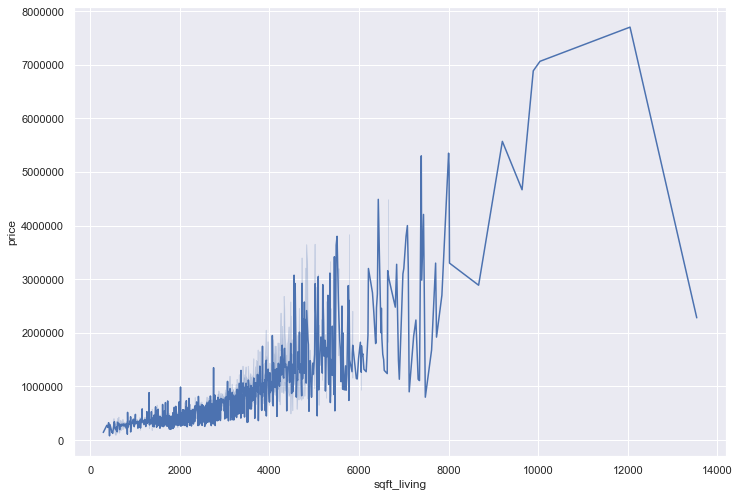

In [47]:
sns.set_style('darkgrid')
x = df_train['sqft_living']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.lineplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

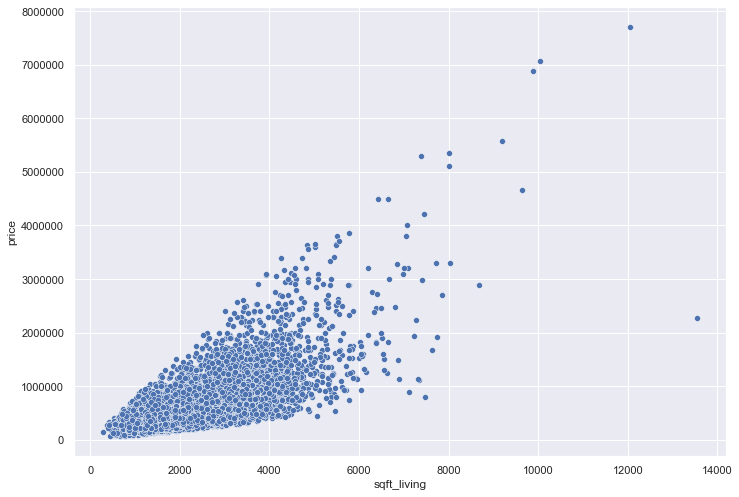

In [48]:
sns.set_style('darkgrid')
x = df_train['sqft_living']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

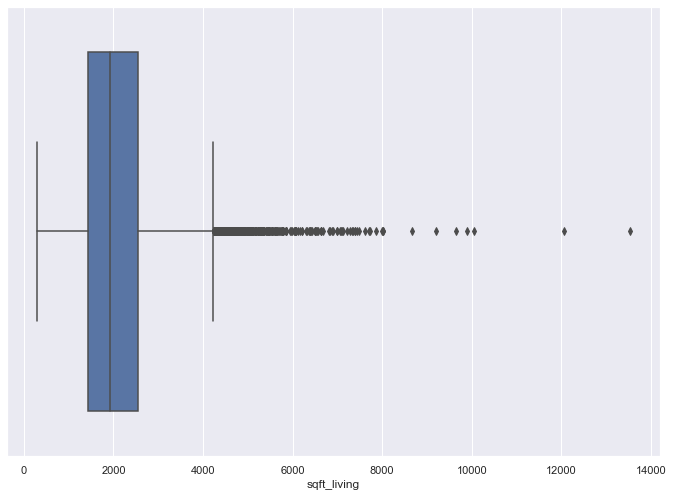

In [49]:
# amount of squarefootage data distribution
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_train["sqft_living"])
sns.set(rc={'figure.figsize':(11.7,8.27)})

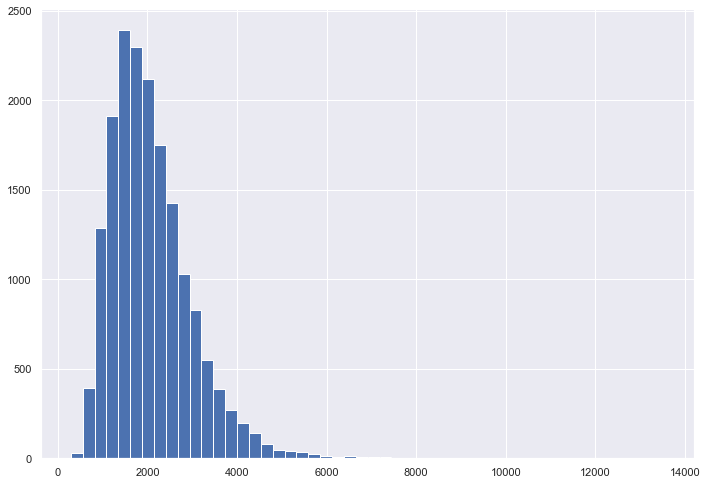

In [50]:
sns.set_theme(style="darkgrid")
df_train['sqft_living'].hist(bins=50, figsize=(11.7,8.27))
plt.show()

In [51]:
#Run linear regression model squarefootage. R-squared is decent.
ols(formula='price~sqft_living', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.694e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:23:55   Log-Likelihood:            -2.4046e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.347e+04   4991.006    -10.714      0.000   -6.33e+04   -4.37e+04
sqft_living   285.4779      2.193    130.167      0.000     281.179     289.777
==============================================================================
Omnibus:                    12367.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507839.480
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      28.878   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lot size of 15 closest neighbors

In [52]:
df_train.corr()['price']['sqft_lot15']

0.08142253547124995

In [53]:
df_train.sort_values('sqft_lot15', ascending = True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2827100075,2014-07-27,286308.0,2,1.50,1220,1036,3.0,0,0,3,7,1220,0,2006,2006,98133,47.7348,-122.347,1210,659,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2827100070,2014-11-05,290000.0,4,1.00,1330,8184,1.5,0,0,3,7,1330,0,1949,1949,98133,47.7343,-122.347,1220,660,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8562780540,2014-12-22,325000.0,2,2.25,1150,711,2.0,0,0,3,7,1150,0,2013,2013,98027,47.5323,-122.070,1150,748,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8562780190,2014-10-07,315000.0,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,2009,98027,47.5321,-122.073,1240,750,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8562780180,2014-06-12,336750.0,2,2.25,1170,1011,2.0,0,0,3,7,1170,0,2009,2009,98027,47.5321,-122.073,1240,750,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,1920,98022,47.2313,-122.023,2560,425581,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1550000463,2014-08-26,637000.0,4,3.50,3080,118918,2.0,0,0,3,9,3080,0,2008,2008,98019,47.7721,-121.924,1830,434728,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3226079059,2014-10-19,549950.0,3,1.75,2930,266587,2.0,0,0,3,8,2440,490,1995,1995,98014,47.6991,-121.947,2700,438213,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Floors

In [54]:
df_train.corr()['price']['floors']

0.25698507185137487

In [55]:
df_train['floors'].value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

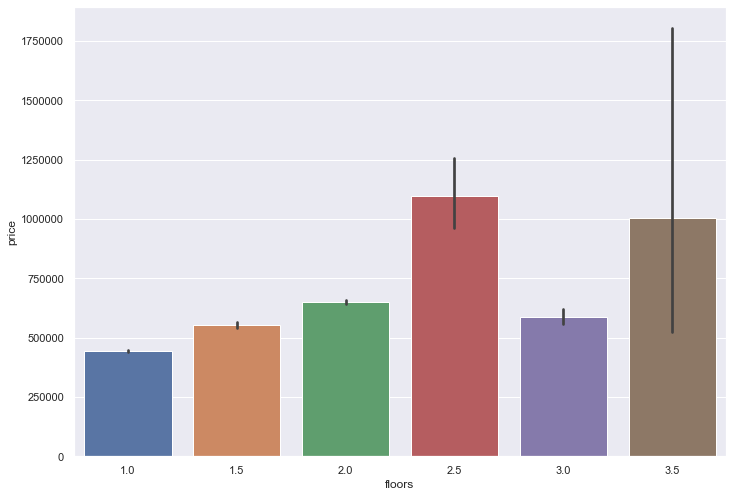

In [56]:
sns.set_style('darkgrid')
x = df_train['floors']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

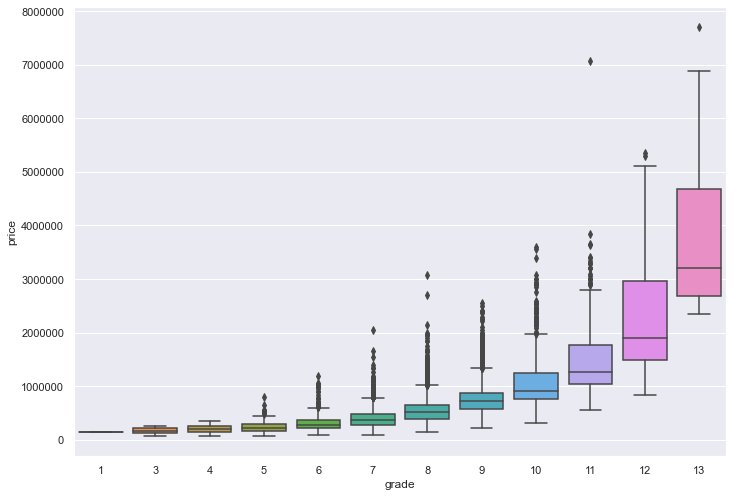

In [57]:
sns.set_style('darkgrid')
x = df_train['grade']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.boxplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

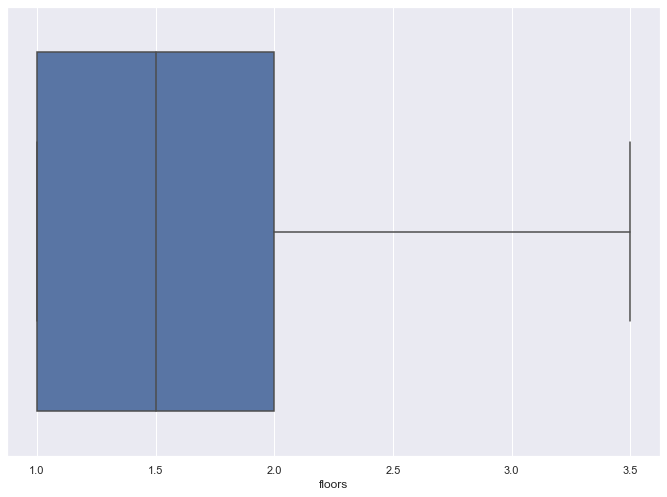

In [58]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_train["floors"])
sns.set(rc={'figure.figsize':(11.7,8.27)})

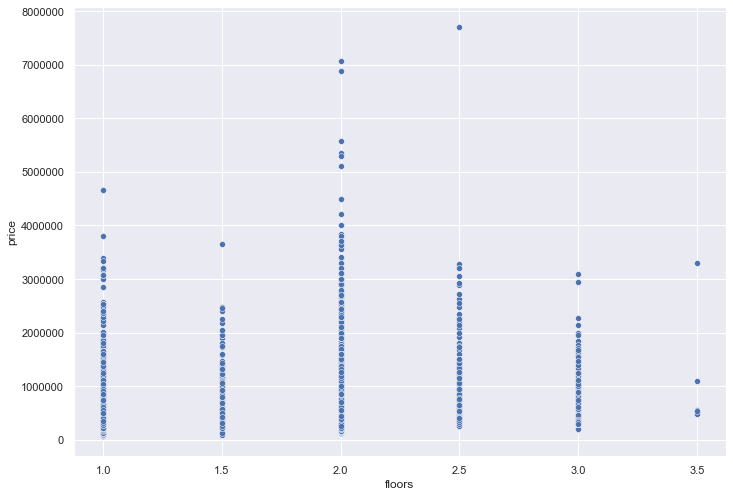

In [59]:
sns.set_style('darkgrid')
x = df_train['floors']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [60]:
# create dummy columns for floors
dummy_zip = pd.get_dummies(df_train.floors)
df_train = pd.concat([df_train,dummy_zip], axis='columns')

In [61]:
df_train = df_train.rename(columns={1.0: '1_floor', 1.5: '1.5_floors', 2.0: '2_floors', 2.5: '2.5_floors', 
                                    3.0: '3_floors', 3.5: '3.5_floors'})

# Zipcode

In [63]:
#need to figure out how to use the dummies here
df_train['price'].corr(df_train['zipcode'])

-0.04895848543382047

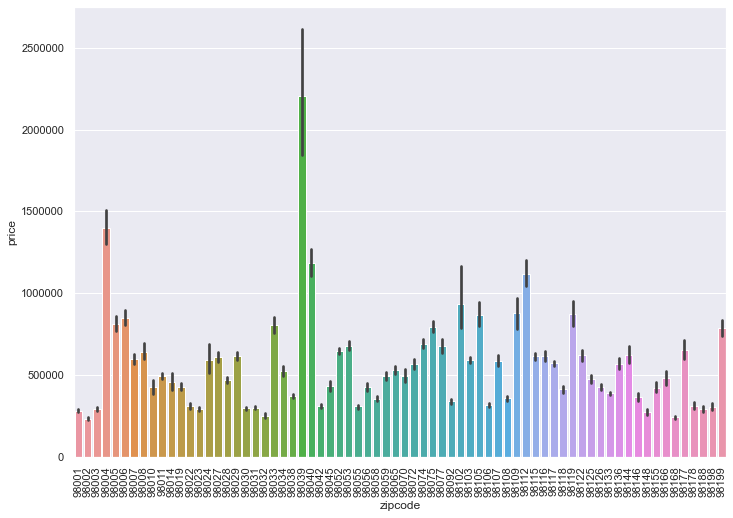

In [64]:
sns.set_style('darkgrid')
x = df_train['zipcode']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

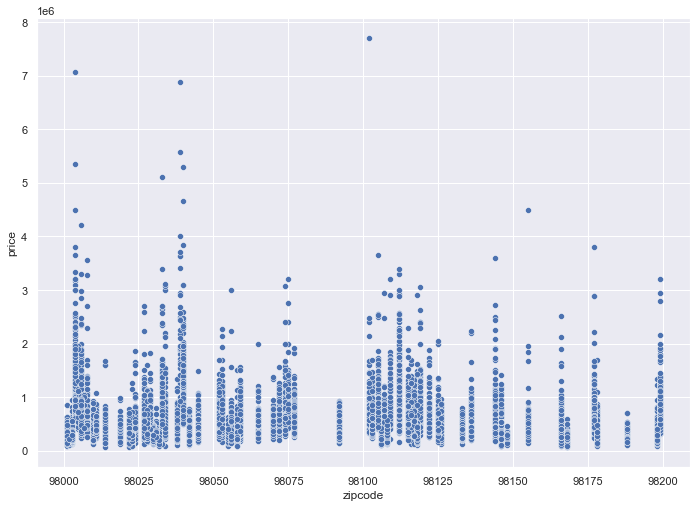

In [65]:
sns.scatterplot(data = df_train, x = df_train['zipcode'], y = df_train['price'])

plt.show()

In [66]:
df_top5zip_price = df_train.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:5]
df_mean_price = df_train.price.mean()
df_top5zip_price

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
Name: price, dtype: float64

In [67]:
df_mean_price = df_train.price.mean()
df_mean_price

540739.5486408329

In [68]:
mean_price_by_zip = df_train.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:70]

In [69]:
count_by_zip = df_train.groupby("zipcode")["price"].count().sort_values(ascending = False)[:70]
mean_price_by_zip = mean_price_by_zip.to_frame()
mean_price_by_zip['count'] = count_by_zip
mean_price_by_zip

,price,count
zipcode,,
98039,2.202790e+06,42
98004,1.396883e+06,237
98040,1.183018e+06,229
98112,1.119458e+06,216
98102,9.336715e+05,80
98109,8.759879e+05,85
98119,8.712724e+05,149
98105,8.687880e+05,170
98006,8.494588e+05,385


In [70]:
mean_price_by_zip.sort_values('count')
#pandas.set_option('display.max_rows', None)

,price,count
zipcode,,
98039,2.202790e+06,42
98148,2.720823e+05,43
98024,5.909915e+05,65
98010,4.248736e+05,74
98102,9.336715e+05,80
98109,8.759879e+05,85
98070,4.956727e+05,99
98014,4.562057e+05,101
98032,2.516022e+05,103


In [71]:
mean_price_by_zip.sort_values('price')

,price,count
zipcode,,
98002,2.322865e+05,157
98168,2.410415e+05,215
98032,2.516022e+05,103
98148,2.720823e+05,43
98001,2.819988e+05,284
98188,2.890318e+05,109
98023,2.895726e+05,410
98003,2.907627e+05,224
98030,2.964029e+05,201


In [72]:
top5_zip_by_mean_price = df_train.groupby("zipcode")['price'].mean().sort_values(ascending = False)[:5]
total_mean_price = df_train.price.mean()
top5_zip_by_mean_price

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
Name: price, dtype: float64

In [73]:
top5_zips_by_avg_number_of_bedrooms = df_train.groupby("zipcode")['bedrooms'].mean().sort_values(ascending = False)[:5]
total_mean_bedrooms = df_train.price.mean()

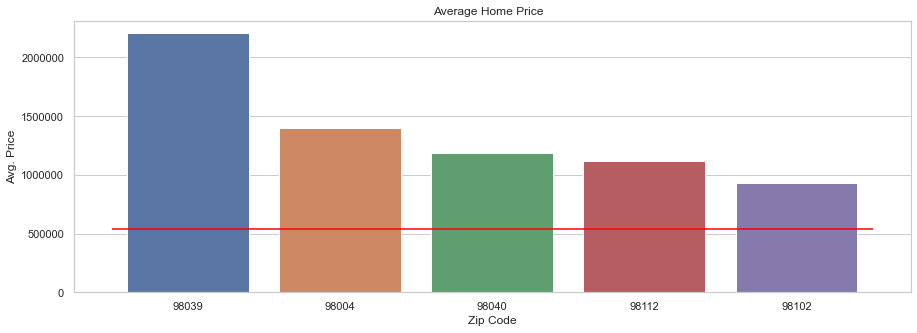

In [74]:
sns.set_style('whitegrid')
x = ['98039', '98004', '98040', '98112', '98102']
y = [2.202790e+06, 1.396883e+06, 1.183018e+06, 1.119458e+06, 9.336715e+05]
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')

ax.set(xlabel='Zip Code', ylabel='Avg. Price')
plt.title("Average Home Price  ") # You can comment this line out if you don't need title
plt.hlines(total_mean_price, -.5 ,4.5, colors="red", label="Average Price")

plt.show()


In [75]:
# create dummy columns for zipcode
dummy_zip = pd.get_dummies(df_train.zipcode)
df_train = pd.concat([df_train,dummy_zip], axis='columns')

In [76]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
from statsmodels.formula.api import ols
ols(formula='price~sqft_living+waterfront', data= df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     9940.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:01   Log-Likelihood:            -2.3975e+05
No. Observations:               17290   AIC:                         4.795e+05
Df Residuals:                   17287   BIC:                         4.795e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.157e+04   4799.822     -8.662      0.000    -5.1e+04   -3.22e+04
sqft_living   276.5279      2.118    130.588      0.000     272.377     280.679
waterfront   8.432e+05   2.19e+04     38.515      0.000       8e+05    8.86e+05
==============================================================================
Omnibus:                    11343.267   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432331.370
Skew:                           2.622   Prob(JB):                         0.00
Kurtosis:                      26.930   Cond. No.                     2.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# run linear regression model on zipcode. Low R-squared score
from statsmodels.formula.api import ols
ols(formula='price~zipcode', data= df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     41.54
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.19e-10
Time:                        00:24:01   Log-Likelihood:            -2.4635e+05
No. Observations:               17290   AIC:                         4.927e+05
Df Residuals:                   17288   BIC:                         4.927e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.398e+07   5.19e+06      6.549      0.000    2.38e+07    4.41e+07
zipcode     -340.9407     52.900     -6.445      0.000    -444.630    -237.251
==============================================================================
Omnibus:                    15988.817   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1114123.276
Skew:                           4.265   Prob(JB):                         0.00
Kurtosis:                      41.389   Cond. No.                     1.79e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Run linear regression model on dummied zipcodes. Significantly higher R-squared score
# can drop zipcodes with p value higher than .05
from statsmodels.formula.api import ols
ols(formula='price~C(zipcode)', data= df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     167.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:01   Log-Likelihood:            -2.4193e+05
No. Observations:               17290   AIC:                         4.840e+05
Df Residuals:                   17220   BIC:                         4.845e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             2.82e+05   1.72e+04     16.421      0.000    2.48e+05    3.16e+05
C(zipcode)[T.98002] -4.971e+04   2.88e+04     -1.727      0.084   -1.06e+05    6701.740
C(zipcode)[T.98003]  8763.9215   2.59e+04      0.339      0.735   -4.19e+04    5.95e+04
C(zipcode)[T.98004]  1.115e+06   2.55e+04     43.787      0.000    1.06e+06    1.16e+06
C(zipcode)[T.98005]  5.268e+05   2.99e+04     17.629      0.000    4.68e+05    5.85e+05
C(zipcode)[T.98006]  5.675e+05   2.26e+04     25.068      0.000    5.23e+05    6.12e+05
C(zipcode)[T.98007]  3.156e+05   3.13e+04     10.073      0.000    2.54e+05    3.77e+05
C(zipcode)[T.98008]  3.588e+05   2.58e+04     13.907      0.000    3.08e+05    4.09e+05
C(zipcode)[T.98010]  1.429e+05   3.78e+04      3.783      0.000    6.88e+04    2.17e+05
C(zipcode)[T.98011]  2.086e+05   2.84e+04      7.337      0.000    1.53e+05    2.64e+05
C(zipcode)[T.98014]  1.742e+05   3.35e+04      5.196      0.000    1.08e+05     2.4e+05
C(zipcode)[T.98019]  1.464e+05   2.95e+04      4.957      0.000    8.85e+04    2.04e+05
C(zipcode)[T.98022]  2.677e+04   2.72e+04      0.985      0.324   -2.65e+04       8e+04
C(zipcode)[T.98023]  7573.8820   2.23e+04      0.339      0.735   -3.62e+04    5.14e+04
C(zipcode)[T.98024]   3.09e+05   3.98e+04      7.765      0.000    2.31e+05    3.87e+05
C(zipcode)[T.98027]  3.253e+05   2.34e+04     13.907      0.000    2.79e+05    3.71e+05
C(zipcode)[T.98028]  1.864e+05    2.6e+04      7.163      0.000    1.35e+05    2.37e+05
C(zipcode)[T.98029]  3.337e+05   2.51e+04     13.295      0.000    2.84e+05    3.83e+05
C(zipcode)[T.98030]   1.44e+04   2.67e+04      0.540      0.589   -3.79e+04    6.67e+04
C(zipcode)[T.98031]   1.86e+04   2.62e+04      0.711      0.477   -3.27e+04    6.99e+04
C(zipcode)[T.98032]  -3.04e+04   3.33e+04     -0.913      0.361   -9.56e+04    3.48e+04
C(zipcode)[T.98033]  5.207e+05    2.3e+04     22.601      0.000    4.76e+05    5.66e+05
C(zipcode)[T.98034]  2.419e+05   2.21e+04     10.955      0.000    1.99e+05    2.85e+05
C(zipcode)[T.98038]  8.642e+04   2.19e+04      3.949      0.000    4.35e+04    1.29e+05
C(zipcode)[T.98039]  1.921e+06   4.78e+04     40.147      0.000    1.83e+06    2.01e+06
C(zipcode)[T.98040]   9.01e+05   2.57e+04     35.055      0.000    8.51e+05    9.51e+05
C(zipcode)[T.98042]  2.717e+04   2.22e+04      1.224      0.221   -1.63e+04    7.07e+04
C(zipcode)[T.98045]  1.493e+05   2.78e+04      5.378      0.000    9.49e+04    2.04e+05
C(zipcode)[T.98052]  3.641e+05   2.17e+04     16.764      0.000    3.21e+05    4.07e+05
C(zipcode)[T.98053]  3.953e+05   2.35e+04     16.805      0.000    3.49e+05    4.41e+05
C(zipcode)[T.98055]  2.485e+04   2.63e+04      0.944      0.345   -2.68e+04    7.65e+04
C(zipcode)[T.98056]  1.415e+05   2.33e+04      6.066      0.000    9.58e+04    1.87e+05
C(z

# Basement

In [80]:
# add a new feature for whether homes have a baesment
df_train['has_basement'] = [0 if x == 0 else 1 for x in df_train.sqft_basement]
df_train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,has_basement
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627300195,2015-03-03,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,1958,98008,47.5858,-122.112,2730,10400,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8819900270,2014-05-20,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,1948,98105,47.6687,-122.288,1350,4013,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3816300095,2014-05-14,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,1953,98028,47.7635,-122.262,1760,9403,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
df_train['price'].corr(df_train['has_basement'])

0.17697029253082638

Text(0.5, 1.0, 'Median prices of homes with basements and without')

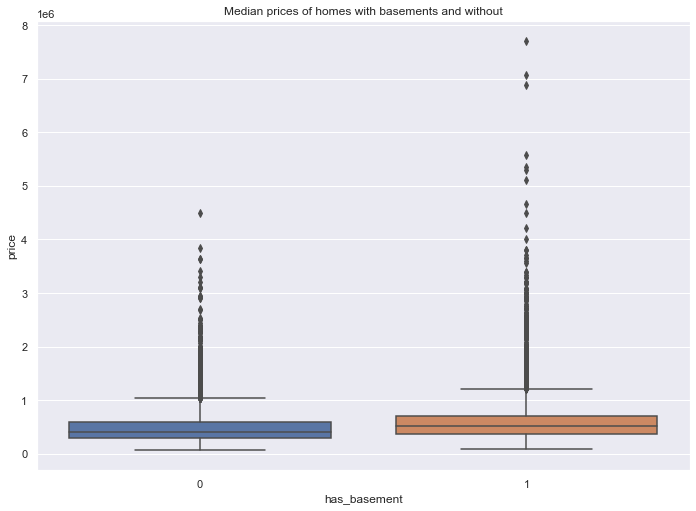

In [82]:
sns.set(style="darkgrid")
sns.boxplot(x=df_train["has_basement"],y=df_train["price"])
plt.title("Median prices of homes with basements and without")

In [83]:
# 2 sample t test
# H0: There is no difference in price between homes with a basement and those without.
# Ha: The is a difference in price between homes with a basement and those without.

no_basement = df_train[df_train['has_basement']==0]['price']
basement = df_train[df_train['has_basement']==1]['price']

st.ttest_ind(no_basement, basement)
#pvalue is less than 0.05 so reject null hypothesis

Ttest_indResult(statistic=-23.64189256331611, pvalue=1.2107663322174255e-121)

#  Price per square foot

I did not end up using this feature because there was collinearity with price

In [84]:
# add new feature--price per square foot
#df_train['price_sqft'] = df_train['price']/df_train['sqft_living']
#df_train

In [85]:
#df_train['price'].corr(df_train['price_sqft'])

In [86]:
#sns.scatterplot(data = df_train, x = df_train['price_sqft'], y = df_train['price'])

#plt.show()

In [87]:
# distribution of price per squarefoot
#sns.set_theme(style="darkgrid")
#df_train['price_sqft'].hist(bins=50, figsize=(11.7,8.27))
#plt.show()

# Bedroom to bathroom ratio

In [88]:
# add new featre--bedroom bathroom ratio
df_train['bed_bath_ratio'] = round(df_train['bedrooms']/df_train['bathrooms'], 2)
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,has_basement,bed_bath_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.78
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.67
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.86
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20


In [89]:
df_train.corr()['price']['bed_bath_ratio']

-0.2494827452521015

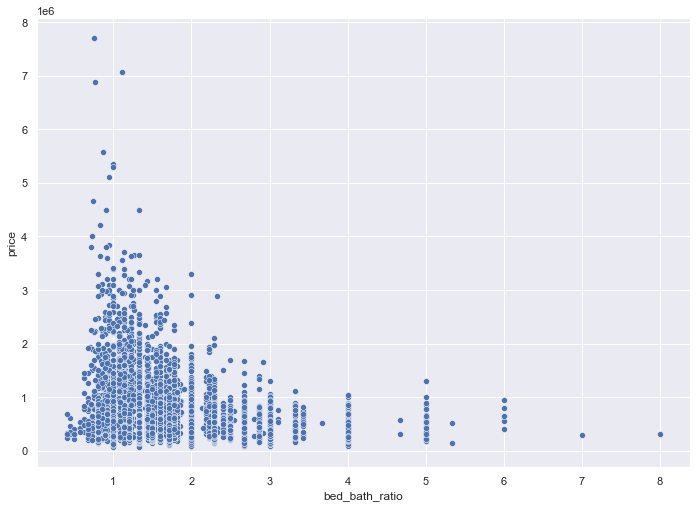

In [90]:
sns.scatterplot(data = df_train, x = df_train['bed_bath_ratio'], y = df_train['price'])

plt.show()

In [91]:
# linear regression model, R-squared is low
ols(formula='price~C(bed_bath_ratio)', data= df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     83.11
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:02   Log-Likelihood:            -2.4351e+05
No. Observations:               17290   AIC:                         4.872e+05
Df Residuals:                   17208   BIC:                         4.878e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.758e+05   1.42e+05      2.649      0.008    9.77e+04    6.54e+05
C(bed_bath_ratio)[T.0.44]  6.044e+04   2.13e+05      0.284      0.776   -3.57e+05    4.78e+05
C(bed_bath_ratio)[T.0.5]  -6.379e+04   2.13e+05     -0.300      0.764   -4.81e+05    3.53e+05
C(bed_bath_ratio)[T.0.57]  5.309e+04   2.13e+05      0.249      0.803   -3.64e+05     4.7e+05
C(bed_bath_ratio)[T.0.62]  4.909e+05   1.81e+05      2.714      0.007    1.36e+05    8.45e+05
C(bed_bath_ratio)[T.0.67]  2.308e+05   1.56e+05      1.480      0.139   -7.49e+04    5.37e+05
C(bed_bath_ratio)[T.0.7]   1.564e+06   3.48e+05      4.501      0.000    8.83e+05    2.25e+06
C(bed_bath_ratio)[T.0.71]    1.5e+06   2.01e+05      7.474      0.000    1.11e+06    1.89e+06
C(bed_bath_ratio)[T.0.73]  4.817e+05    1.6e+05      3.004      0.003    1.67e+05    7.96e+05
C(bed_bath_ratio)[T.0.74]  4.292e+06   3.48e+05     12.351      0.000    3.61e+06    4.97e+06
C(bed_bath_ratio)[T.0.75]  1.411e+06   1.71e+05      8.245      0.000    1.08e+06    1.75e+06
C(bed_bath_ratio)[T.0.76]  1.299e+06   2.13e+05      6.105      0.000    8.82e+05    1.72e+06
C(bed_bath_ratio)[T.0.77]  4.186e+06   2.65e+05     15.771      0.000    3.67e+06    4.71e+06
C(bed_bath_ratio)[T.0.8]   2.704e+05   1.44e+05      1.879      0.060   -1.16e+04    5.52e+05
C(bed_bath_ratio)[T.0.83]  2.182e+06   2.13e+05     10.253      0.000    1.76e+06     2.6e+06
C(bed_bath_ratio)[T.0.84]  1.224e+06   1.86e+05      6.589      0.000     8.6e+05    1.59e+06
C(bed_bath_ratio)[T.0.86]  4.021e+05   1.45e+05      2.778      0.005    1.18e+05    6.86e+05
C(bed_bath_ratio)[T.0.87]  3.369e+06   2.65e+05     12.693      0.000    2.85e+06    3.89e+06
C(bed_bath_ratio)[T.0.88]  1.904e+06   3.48e+05      5.479      0.000    1.22e+06    2.59e+06
C(bed_bath_ratio)[T.0.89]  3.259e+05   1.45e+05      2.252      0.024    4.23e+04    6.09e+05
C(bed_bath_ratio)[T.0.91]  3.385e+06   2.32e+05     14.611      0.000    2.93e+06    3.84e+06
C(bed_bath_ratio)[T.0.92]  3.964e+05   1.44e+05      2.746      0.006    1.13e+05    6.79e+05
C(bed_bath_ratio)[T.0.94]  1.172e+06   1.52e+05      7.696      0.000    8.73e+05    1.47e+06
C(bed_bath_ratio)[T.0.95]  3.111e+06   2.32e+05     13.428      0.000    2.66e+06    3.57e+06
C(bed_bath_ratio)[T.1.0]   2.396e+05   1.43e+05      1.680      0.093   -3.99e+04    5.19e+05
C(bed_bath_ratio)[T.1.04]  4.242e+05   3.48e+05      1.221      0.222   -2.57e+05    1.11e+06
C(bed_bath_ratio)[T.1.05]  1.433e+06   2.01e+05      7.140      0.000    1.04e+06    1.83e+06
C(bed_bath_ratio)[T.1.07]   9.07e+05   1.47e+05      6.176      0.000    6.19e+05    1.19e+06
C(bed_bath_ratio)[T.1.09]  2.663e+05   1.44e+05      1.855      0.064   -1.51e+04    5.48e+05
C(bed_bath_ratio)[T.1.11]  1.148e+06   1.54e+05      7.430      0.000    8.

# Yard space

**There does not appear to be a correlation between price and yard space**

In [92]:
# create new feature - yard space
df_train['yard_space'] = round(df_train.sqft_lot - (df_train.sqft_living / df_train.floors), 2)
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,has_basement,bed_bath_ratio,yard_space
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.78,7858.0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.67,3830.0
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60,9008.0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.86,12328.0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,4101.0


In [93]:
# very low to no correlation
df_train['price'].corr(df_train['yard_space'])

0.08025236208775371

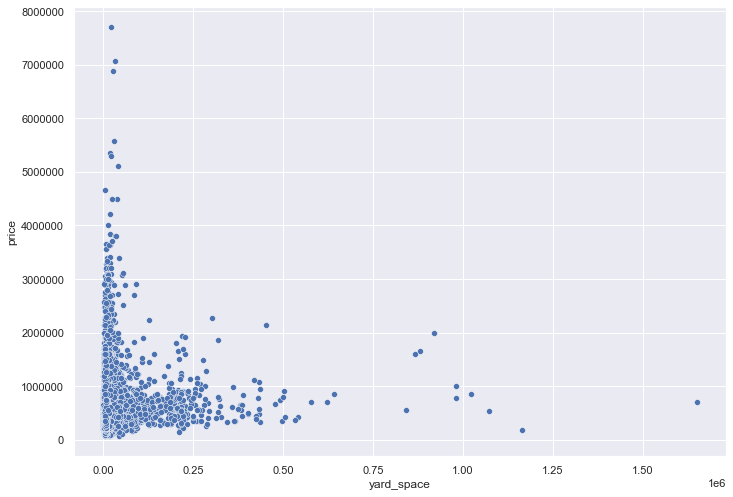

In [94]:
sns.set_style('darkgrid')
x = df_train['yard_space']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [95]:
#linear regression -- very low R-squared
ols(formula='price~yard_space', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     112.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.16e-26
Time:                        00:24:02   Log-Likelihood:            -2.4631e+05
No. Observations:               17290   AIC:                         4.926e+05
Df Residuals:                   17288   BIC:                         4.926e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.31e+05   2976.441    178.394      0.000    5.25e+05    5.37e+05
yard_space     0.7097      0.067     10.586      0.000       0.578       0.841
==============================================================================
Omnibus:                    16059.616   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136259.858
Skew:                           4.291   Prob(JB):                         0.00
Kurtosis:                      41.776   Cond. No.                     4.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Grade

In [96]:
df_train['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [97]:
# high correlation coefficient
df_train['price'].corr(df_train['grade'])

0.6662149551378923

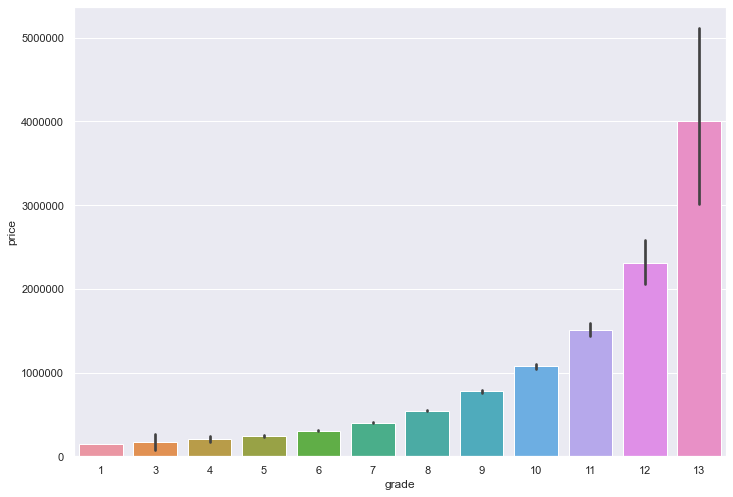

In [98]:
sns.set_style('darkgrid')
x = df_train['grade']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

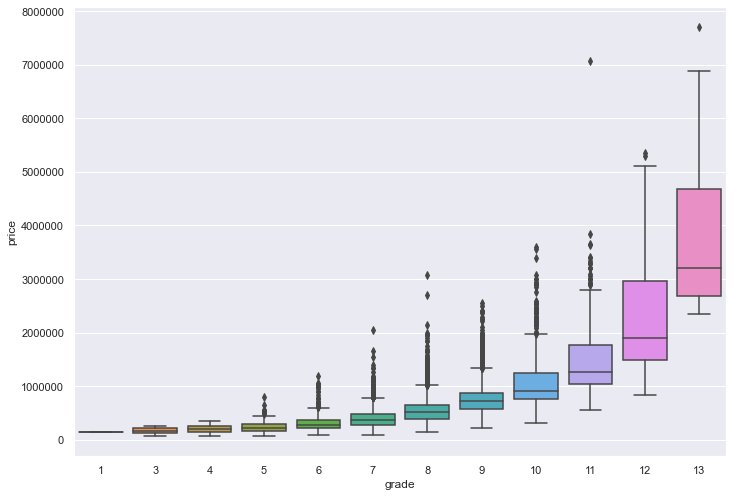

In [99]:
sns.set_style('darkgrid')
x = df_train['grade']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.boxplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

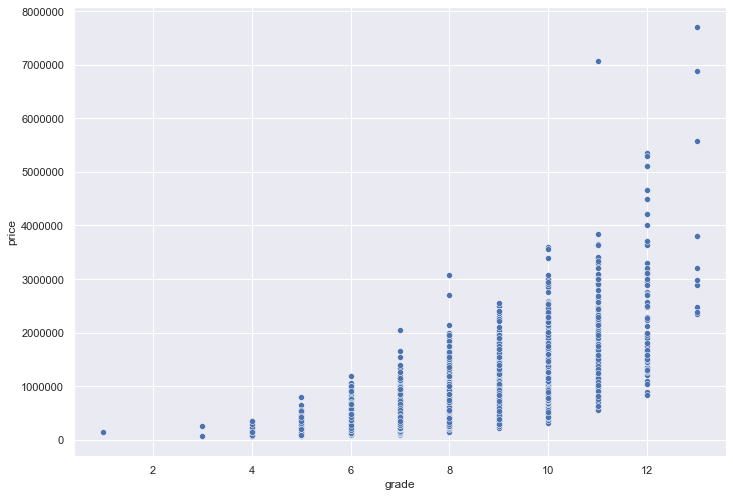

In [100]:
sns.set_style('darkgrid')
x = df_train['grade']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [103]:
# linear regression - moderate R-squared
ols(formula='price~grade', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.380e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:03   Log-Likelihood:            -2.4129e+05
No. Observations:               17290   AIC:                         4.826e+05
Df Residuals:                   17288   BIC:                         4.826e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.08e+06    1.4e+04    -77.361      0.000   -1.11e+06   -1.05e+06
grade       2.117e+05   1802.490    117.459      0.000    2.08e+05    2.15e+05
==============================================================================
Omnibus:                    16703.848   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2005579.787
Skew:                           4.376   Prob(JB):                         0.00
Kurtosis:                      55.032   Cond. No.                         51.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# linear regression - higher R-squared
ols(formula='price~C(grade)', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1764.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:03   Log-Likelihood:            -2.3986e+05
No. Observations:               17290   AIC:                         4.797e+05
Df Residuals:                   17278   BIC:                         4.798e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.42e+05   2.56e+05      0.554      0.580    -3.6e+05    6.44e+05
C(grade)[T.3]    2.65e+04   3.14e+05      0.084      0.933   -5.89e+05    6.42e+05
C(grade)[T.4]   6.864e+04   2.62e+05      0.262      0.793   -4.45e+05    5.82e+05
C(grade)[T.5]   1.018e+05   2.57e+05      0.396      0.692   -4.02e+05    6.06e+05
C(grade)[T.6]   1.607e+05   2.56e+05      0.627      0.531   -3.42e+05    6.63e+05
C(grade)[T.7]   2.605e+05   2.56e+05      1.016      0.309   -2.42e+05    7.63e+05
C(grade)[T.8]    4.01e+05   2.56e+05      1.564      0.118   -1.01e+05    9.03e+05
C(grade)[T.9]   6.322e+05   2.56e+05      2.466      0.014     1.3e+05    1.13e+06
C(grade)[T.10]  9.309e+05   2.56e+05      3.630      0.000    4.28e+05    1.43e+06
C(grade)[T.11]  1.366e+06   2.57e+05      5.321      0.000    8.63e+05    1.87e+06
C(grade)[T.12]  2.172e+06   2.58e+05      8.417      0.000    1.67e+06    2.68e+06
C(grade)[T.13]  3.861e+06   2.68e+05     14.421      0.000    3.34e+06    4.39e+06
==============================================================================
Omnibus:                    12834.683   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           708770.414
Skew:                           3.038   Prob(JB):                         0.00
Kurtosis:                      33.772   Cond. No.                         520.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# dummy grade by category
df_train['low_grade'] = np.where(df_train['grade'] < 6, 1, 0)
df_train['below_average_grade'] = np.where(df_train['grade'] == 6, 1, 0)
df_train['average_grade'] = np.where(df_train['grade'] ==7, 1, 0)
df_train['above_average_grade'] = np.where(df_train['grade'].isin(range(8,9)), 1, 0)
df_train['high_Grade'] = np.where(df_train['grade'] > 9, 1, 0)

In [106]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,has_basement,bed_bath_ratio,yard_space,low_grade,below_average_grade,average_grade,above_average_grade,high_Grade
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.78,7858.0,0,0,0,1,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.67,3830.0,0,0,0,1,0
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60,9008.0,0,0,0,0,1
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.86,12328.0,0,0,0,0,1
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,4101.0,0,0,0,0,0


# View

In [107]:
df_train['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

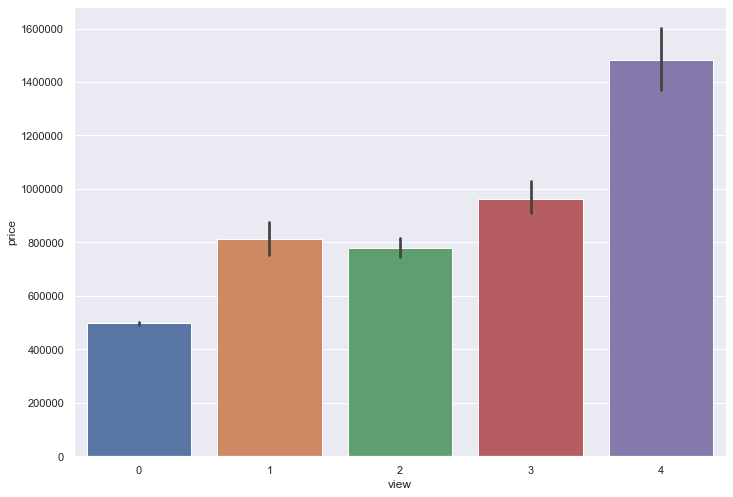

In [108]:
sns.set_style('darkgrid')
x = df_train['view']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()


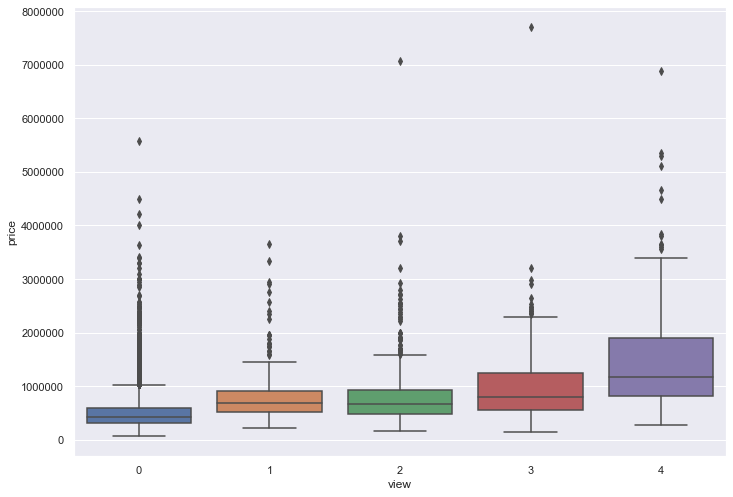

In [109]:
sns.set_style('darkgrid')
x = df_train['view']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.boxplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

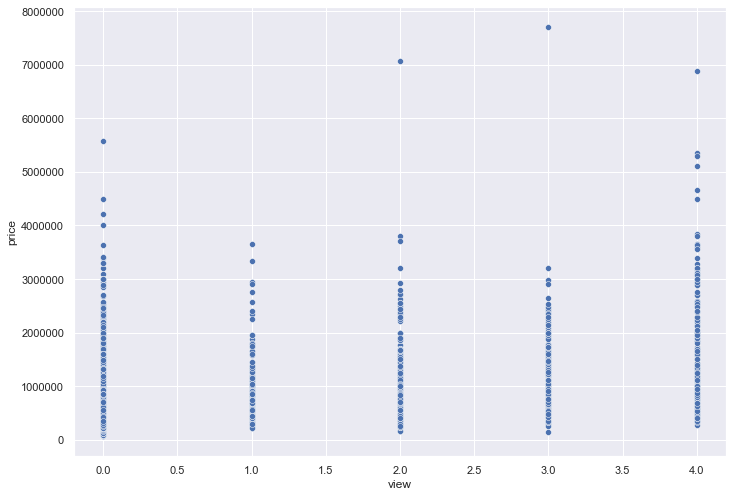

In [110]:
sns.set_style('darkgrid')
x = df_train['view']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [111]:
df_train['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [112]:
df_train['price'].corr(df_train['view'])

0.3954851030218899

In [113]:
# linear regression model - low R-squared
ols(formula='price~view', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3205.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:04   Log-Likelihood:            -2.4490e+05
No. Observations:               17290   AIC:                         4.898e+05
Df Residuals:                   17288   BIC:                         4.898e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.953e+05   2728.367    181.542      0.000     4.9e+05    5.01e+05
view        1.904e+05   3363.905     56.616      0.000    1.84e+05    1.97e+05
==============================================================================
Omnibus:                    15114.105   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1032332.157
Skew:                           3.884   Prob(JB):                         0.00
Kurtosis:                      40.049   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# linear regression model - slightly higher R-squared
ols(formula='price~C(view)', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     876.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:24:04   Log-Likelihood:            -2.4477e+05
No. Observations:               17290   AIC:                         4.895e+05
Df Residuals:                   17285   BIC:                         4.896e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.968e+05   2728.085    182.095      0.000    4.91e+05    5.02e+05
C(view)[T.1]   3.17e+05   2.11e+04     15.004      0.000    2.76e+05    3.58e+05
C(view)[T.2]  2.827e+05   1.25e+04     22.560      0.000    2.58e+05    3.07e+05
C(view)[T.3]  4.672e+05    1.7e+04     27.433      0.000    4.34e+05    5.01e+05
C(view)[T.4]  9.849e+05   2.09e+04     47.132      0.000    9.44e+05    1.03e+06
==============================================================================
Omnibus:                    14976.743   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1031331.288
Skew:                           3.821   Prob(JB):                         0.00
Kurtosis:                      40.056   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Anova (f test)

import scipy.stats as st

st.f_oneway(df_train['view'],df_train['price'])
# pvalue less than 0.5 so reject null hypothesis

F_onewayResult(statistic=36275.27724217961, pvalue=0.0)

In [116]:
# create dummy columns for bedrooms
dummy_zip = pd.get_dummies(df_train.view)
df_train = pd.concat([df_train,dummy_zip], axis='columns')

In [117]:
df_train = df_train.rename(columns={0: '0_view', 1: '1_view', 2: '2_view', 3: '3_view', 
                                    4: '4_view'})

In [118]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,has_basement,bed_bath_ratio,yard_space,low_grade,below_average_grade,average_grade,above_average_grade,high_Grade,0_view,1_view,2_view,3_view,4_view
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.78,7858.0,0,0,0,1,0,1,0,0,0,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.67,3830.0,0,0,0,1,0,1,0,0,0,0
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60,9008.0,0,0,0,0,1,0,0,1,0,0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.86,12328.0,0,0,0,0,1,0,0,1,0,0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,4101.0,0,0,0,0,0,1,0,0,0,0


# Waterfront

In [119]:
# a value of one indicates that a home is on the waterfront
df_train['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

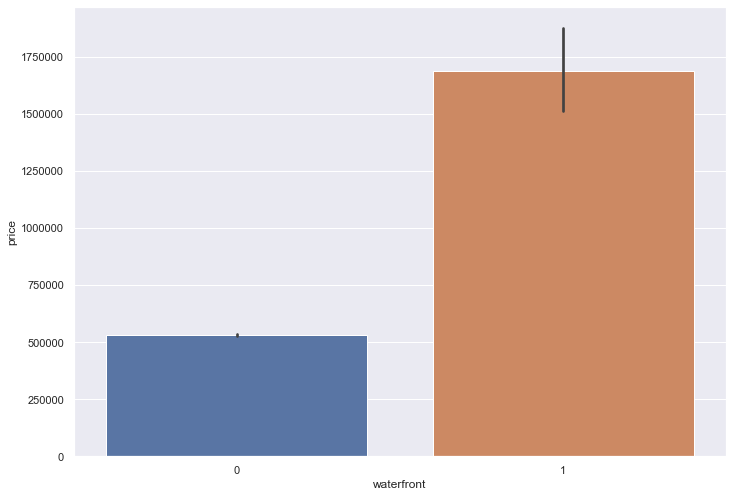

In [120]:
sns.set_style('darkgrid')
x = df_train['waterfront']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

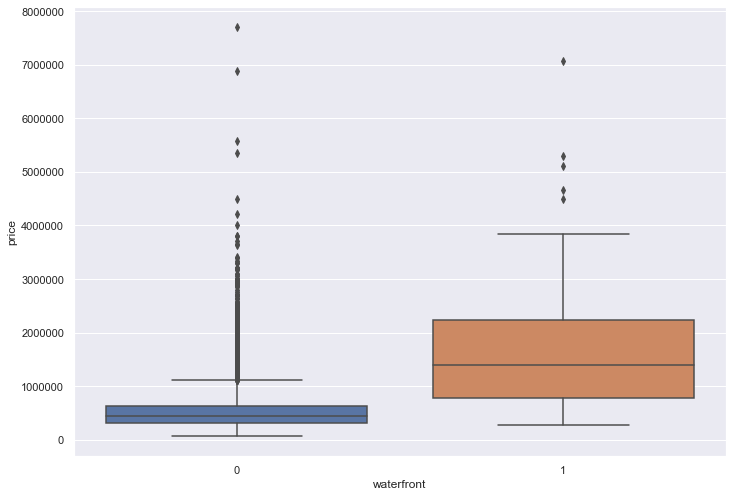

In [121]:
sns.set_style('darkgrid')
x = df_train['waterfront']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.boxplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

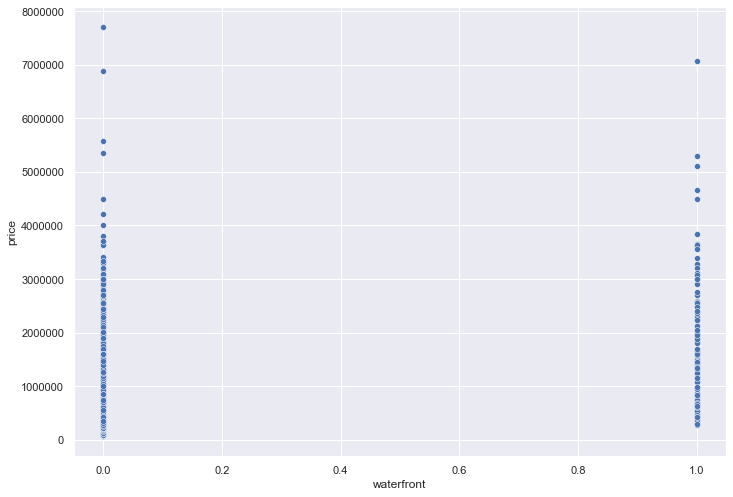

In [122]:
sns.set_style('darkgrid')
x = df_train['waterfront']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [123]:
df_train['price'].corr(df_train['waterfront'])

0.275778670804662

In [124]:
# 2 sample t test
not_waterfront = df_train[df_train['waterfront']==0]['price']
waterfront = df_train[df_train['waterfront']==1]['price']

st.ttest_ind(not_waterfront, waterfront)

Ttest_indResult(statistic=-37.72330429549608, pvalue=2.465038317654299e-299)

In [125]:
# linear regression model - very low score
ols(formula='price~waterfront', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1423.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          2.47e-299
Time:                        00:24:05   Log-Likelihood:            -2.4568e+05
No. Observations:               17290   AIC:                         4.914e+05
Df Residuals:                   17288   BIC:                         4.914e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.315e+05   2740.051    193.976      0.000    5.26e+05    5.37e+05
waterfront  1.157e+06   3.07e+04     37.723      0.000     1.1e+06    1.22e+06
==============================================================================
Omnibus:                    14985.003   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           938242.704
Skew:                           3.862   Prob(JB):                         0.00
Kurtosis:                      38.252   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Condition

In [126]:
df_train['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [127]:
df_train['price'].corr(df_train['condition'])

0.03609884124957835

In [128]:
df_train['sqft_living'].corr(df_train['condition'])

-0.061530287781153596

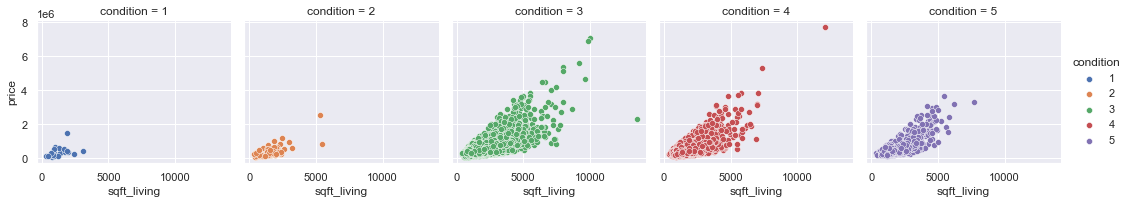

In [129]:
grid = sns.FacetGrid(df_train, col = "condition", hue = "condition", col_wrap=5)
grid.map(sns.scatterplot, "sqft_living", "price")

grid.add_legend()

plt.show()


In [130]:
# create dummy columns for bedrooms
dummy_zip = pd.get_dummies(df_train.condition)
df_train = pd.concat([df_train,dummy_zip], axis='columns')

In [131]:
df_train = df_train.rename(columns={1: '1_condition', 2: '2_condition', 3: '3_condition', 4: '4_condition', 
                                    5: '5_condition'})

# Year built

In [132]:
df_train['price'].corr(df_train['yr_built'])

0.05645007489461684

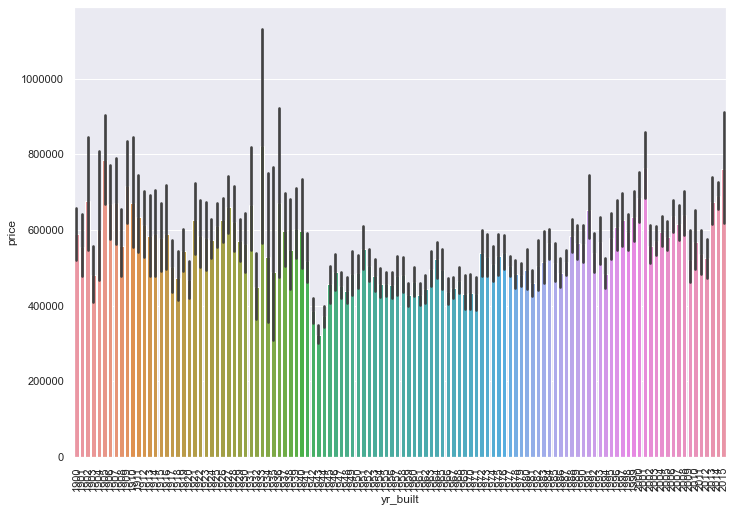

In [133]:
sns.set_style('darkgrid')
x = df_train['yr_built']
y = df_train['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


# Maps

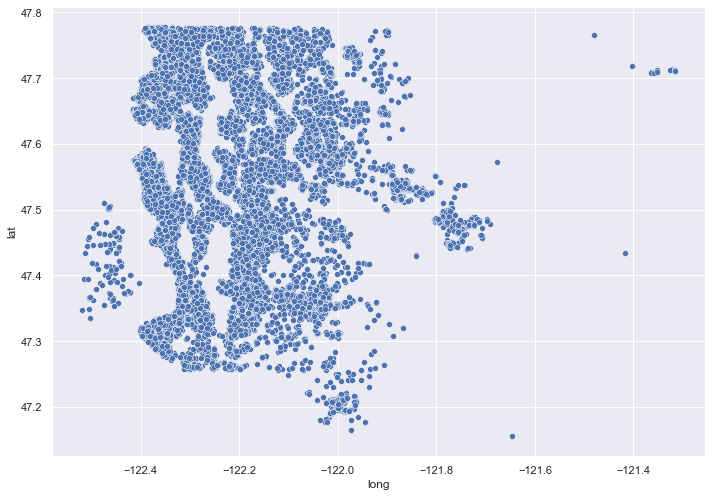

In [134]:
sns.set_style('darkgrid')
x = df_train['long']
y = df_train['lat']
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x,y=y, data=df_train)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

# Save dataframe to csv

In [136]:
df_train.to_csv('csv/df_train.csv')

In [138]:
df_train.shape

(17290, 133)